# Lista 1

## zadanie 1

In [1]:
import requests
import pandas as pd
from io import StringIO

# URL do pliku
url = 'https://prac.im.pwr.edu.pl/~wyloman/szcz_2024_2025/zad1_lista1.txt'

# Pobranie danych z wyłączoną weryfikacją SSL
response = requests.get(url, verify=False)

# Ostrzeżenie o wyłączonym SSL
import warnings
warnings.filterwarnings('ignore')

# Sprawdzenie, czy pobranie się powiodło
if response.status_code == 200:
    data = response.text
else:
    print(f'Błąd pobierania pliku: {response.status_code}')

# Wczytanie danych do DataFrame
df = pd.read_csv(StringIO(data), delim_whitespace=True, header=None)

# Nadanie nazw kolumnom (jeśli potrzebne)
df.columns = ['X', 'Y']

# Wyświetlenie pierwszych kilku wierszy danych
print(df.head())



          X          Y
0  0.204906  -3.220550
1  0.098946  -1.125868
2  2.063672  12.928829
3  0.090608   6.917862
4  0.458298  -0.604774


C:\Users\Maria Nowacka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prac.im.pwr.edu.pl'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [2]:
X, Y = df['X'], df['Y']

In [3]:
import matplotlib.pyplot as plt, numpy as np
from scipy.optimize import curve_fit

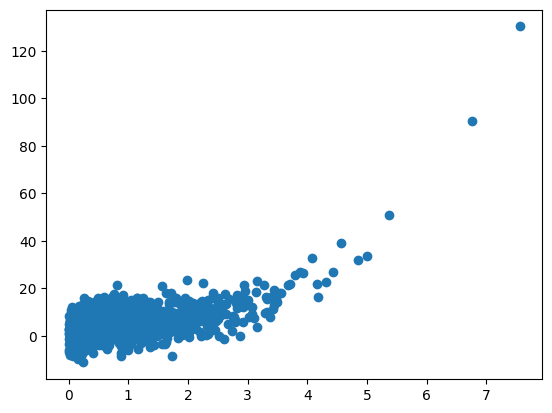

In [4]:
plt.scatter(X, Y)

In [5]:
def model(x, a, b):
    return a*np.exp(b*x)

In [6]:
popt, pcov = curve_fit(model, X, Y)
a, b = popt
print(f'Y = {a:.3f} * exp({b:.3f} * X)')

Y = 2.990 * exp(0.500 * X)


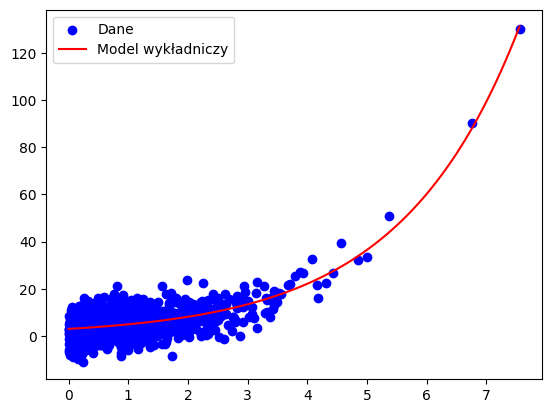

In [7]:
# Rysowanie wykresu rozproszenia
plt.scatter(X, Y, label='Dane', color='blue')

# Rysowanie dopasowanej funkcji wykładniczej
X_fit = np.linspace(min(X), max(X), 100)
Y_fit = model(X_fit, *popt)
plt.plot(X_fit, Y_fit, label='Model wykładniczy', color='red')
plt.legend()

## zadanie 2

In [16]:
url2 = "https://prac.im.pwr.edu.pl/~wyloman/szcz_2024_2025/zad2_lista1.txt"
response = requests.get(url2, verify=False)

if response.status_code == 200:
    data = response.text
else:
    print(f'Błąd pobierania pliku: {response.status_code}')

df2 = pd.read_csv(StringIO(data), delim_whitespace=True, header=None)
print(df2)

             0
0     1.838676
1     1.855805
2     0.697521
3     1.296238
4     0.755621
...        ...
9995 -0.264952
9996  1.841796
9997 -0.019291
9998  0.016198
9999  2.329453

[10000 rows x 1 columns]


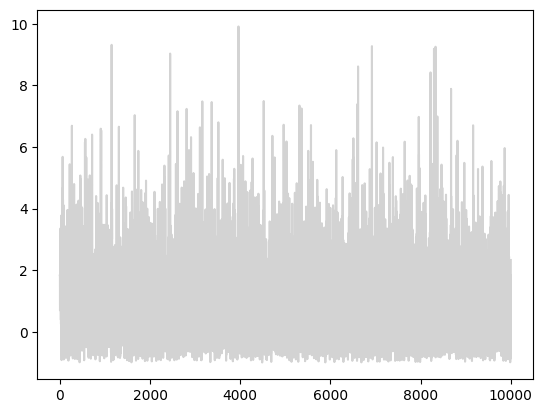

In [21]:
def simple_moving_average(data, window):
    return data.rolling(window=window, center=True).mean()

# Średnie ruchome o podstawie 11, 25 oraz 2p+1
window_11 = simple_moving_average(df2, 11)
window_25 = simple_moving_average(df2, 25)
p = 2
window_2p1 = simple_moving_average(df2, 2 * p + 1)

# Wykres surowych danych
plt.plot(df2, label='Dane surowe', color='lightgrey')


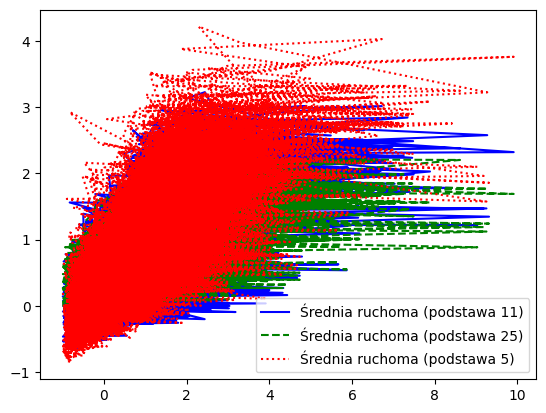

In [30]:
# Wykresy średnich ruchomych
plt.plot(df2, window_11, label='Średnia ruchoma (podstawa 11)', color='blue')
plt.plot(df2, window_25, label='Średnia ruchoma (podstawa 25)', color='green', linestyle = '--')
plt.plot(df2, window_2p1, label=f'Średnia ruchoma (podstawa {2*p+1})', color='red', linestyle = ':')
plt.legend()

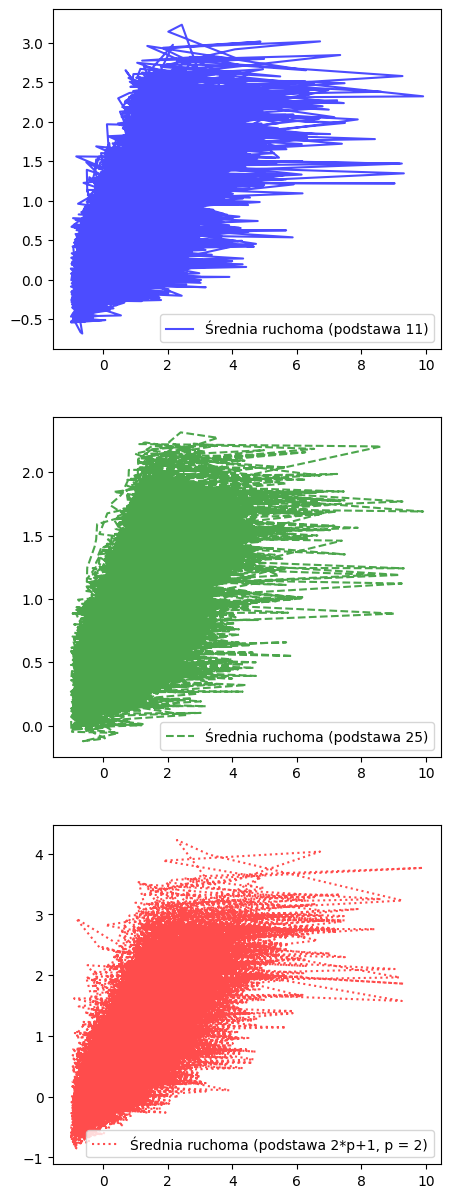

In [36]:
plt.figure(figsize=(5,15))
plt.subplot(3,1,1)
plt.plot(df2, window_11, label='Średnia ruchoma (podstawa 11)', alpha = 0.7, color='blue')
plt.legend()
plt.subplot(3,1,2)
plt.plot(df2, window_25, label='Średnia ruchoma (podstawa 25)', alpha = 0.7, color='green', linestyle='--')
plt.legend()
plt.subplot(3,1,3)
plt.plot(df2, window_2p1, label=f'Średnia ruchoma (podstawa 2*p+1, p = {p})', color='red', alpha=0.7, linestyle = ':')
plt.legend(loc='lower right')
plt.show()

## zadanie 3

In [53]:
from scipy.stats import linregress

In [37]:
url3 = "https://prac.im.pwr.edu.pl/~wyloman/szcz_2024_2025/zad3_lista1.txt"

In [38]:
response = requests.get(url3, verify=False)

if response.status_code == 200:
    data = response.text
else:
    print(f'Błąd pobierania pliku: {response.status_code}')

df3 = pd.read_csv(StringIO(data), delim_whitespace=True, header=None)


In [40]:
x = df2
y = df3

In [41]:
window1 = x.rolling(window=3, center=True).mean()
x_smooth = window1.dropna()
y_smooth = y[len(y)-len(x_smooth):]

In [54]:
# slope, intercept, r, p, se = linregress(x, y)
result = linregress(x, y)

ValueError: too many values to unpack (expected 4)